In [26]:
#---------------------- Header 
from easydict import EasyDict
import os
import json
args = EasyDict()

#------ image list 
i_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3_20231028043354_61071_09341261_L1G_PS/0-Pusan-2023-AO_16_K3_20231028043354_61071_09341261_L1G_PRGB_georeferencing_32652.png"

#------ tif list 
t_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3_20231028043354_61071_09341261_L1G_PS/K3_20231028043354_61071_09341261_L1G_PRGB_georeferencing_32652.tif"

#------ gpu
args.gpu_id = 0

#------ model 
args.img_path = i_1

print( '/'.join( args.img_path.split("/")[0:-1]) )
args.infer_threshold = 0.2
args.infer_threshold_showing = 0.5
source_root ='/'.join( args.img_path.split("/")[0:-1])

args.img_output = args.img_path.replace(".png" ,"_output_v5_1212.png")
args.img_output_masked = args.img_path.replace(".png" ,"_output_v5_1212_NewMasked.png")
args.img_output_scatter = args.img_path.replace(".png" ,"_output_v5_1212_Only_Scatter.png")

args.csv_output = args.img_path.replace(".png","_masked_v5_1212.csv")
args.csv_output_scatter = args.img_path.replace(".png","scatter_v5_1212.csv")

#------ Coordinates filtering function
args.txt_path = None

args.xml_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3_20231028043354_61071_09341261_L1G_PS/K3_20231028043354_61071_09341261_L1G_Aux.xml"

#------ Map Shape 
# old mask
#args.map_path = os.path.join(source_root, "map")
#args.map_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Old"
# new mask 
args.map_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Korea_Clipped"


#------ TIF 
args.tf_path = t_1

# time 2023 05 23 04 50 50
args.year_= int( i_1 .split("/")[-2].split("_")[1][0:4])
args.month_ = int(i_1 .split("/")[-2].split("_")[1][4:6])
args.day_ = int(i_1 .split("/")[-2].split("_")[1][6:8])
hour_ = int(i_1 .split("/")[-2].split("_")[1][8:10])
args.hour_ = hour_ + 9
args.min  = int(i_1 .split("/")[-2].split("_")[1][10:12]) 
args.sec =  0
print("time : ", args.year_, args.month_, args.day_, args.hour_, args.min)

#------ AIS csv 
args.data_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/2차-11개/202310281300_dynamic.csv"
args.static_data_path = args.data_path.replace("_dynamic.csv","_static.csv")
args.final_merge = args.img_path.replace(".png",".csv")

# time gap
# 시각화 결과물에서 ais 좌표가 해상도가 더 높아지게 된다. 
args.time_gap_min = 5
args.time_gap_sec = False

# pixel gap 
# this is for visualization
args.pixel_gap = 200

# # latlon gap 
# # 매칭되는 박스와 ais 간의 기준 => 늘리면 R_ 데이터프레임에서 매칭 케이스가 늘어나게 된다. 
# args.latlon_gap = 0.000001

#------ Model Inference 
args.model_test = False
args.Box_Matching = True
args.png_draw_save = True


# Save EasyDict to a file
file_path = os.path.join(source_root ,"config.json" )
with open(file_path, 'w') as json_file:
    json.dump(args, json_file, indent=4)

/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3_20231028043354_61071_09341261_L1G_PS
time :  2023 10 28 13 33


In [2]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000
from adjustText import adjust_text

# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)

/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/PIL/Image.py:3176: DecompressionBombWarning: Image size (1008521856 pixels) exceeds limit of 933120000 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [3]:
img_.size

(35352, 28528)

# 1. Model Inference

In [4]:
import testModule

if args.model_test:
    result = testModule.infer_model(input_file_path=args.img_path,\
                        thres=args.infer_threshold , gpu_id = 0)

In [5]:
#------------------------
# result save
import numpy as np
import os 
save_root = "/mnt/hdd/eric/.tmp_ipy/00.Data/Inference_results"
file_name = args.img_path.split("/")[-1].split(".")[0]+".npy"    

if args.model_test == False:
    result = np.load(os.path.join(save_root,file_name))
else:
    print("Result Saved")
    np.save(os.path.join(save_root,file_name), result)

# 2. AIS csv 

- time condition 에 맞게 filtering 

In [6]:
import pandas as pd

df = pd.read_csv(args.data_path)

In [7]:
#---- current time ----#
import datetime
year_= args.year_
month_ = args.month_ 
day_ = args.day_
hour_ = args.hour_
min  = args.min
sec =  args.sec
crit_time_str = f"{year_}-{month_}-{day_} {hour_}:{min}:{sec}"
date = pd.to_datetime(crit_time_str)

#---- time condition ----#
time_gap_min = args.time_gap_min
time_gap_sec = args.time_gap_sec

earl_time = date - datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)
post_time = date + datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)

print("early : ",earl_time)
print("now : ",date)
print("late : ",post_time)



early :  2023-10-28 13:28:00
now :  2023-10-28 13:33:00
late :  2023-10-28 13:38:00


In [8]:
df.columns

Index(['mmsi_', 'time', 'lon_', 'lat_', 'heading_', 'turn_', 'speed_'], dtype='object')

In [9]:
df.columns = ['mmsi_', 'time', 'long', 'lat', 'heading_', 'turn_', 'speed_']

In [10]:
df

,mmsi_,time,long,lat,heading_,turn_,speed_
0,440066260,2023-10-28 13:00:00,129.049983,35.120033,46.0,-0.0,0.0
1,440233000,2023-10-28 13:00:00,129.170682,35.022577,128.0,32.0,32.3
2,440130790,2023-10-28 13:00:00,129.142168,35.084848,511.0,-128.0,10.4
3,440120570,2023-10-28 13:00:00,128.993715,35.027598,258.0,-6.0,6.7
4,440546000,2023-10-28 13:00:00,128.858783,34.773983,65.0,0.0,11.5
...,...,...,...,...,...,...,...
39299,440204350,2023-10-28 13:59:59,129.074795,35.090592,511.0,-128.0,0.0
39300,440110910,2023-10-28 13:59:59,129.065777,35.109070,359.0,-6.0,0.0
39301,440023940,2023-10-28 13:59:59,129.032077,35.091743,511.0,-128.0,0.0
39302,440154430,2023-10-28 13:59:59,129.204232,35.137183,41.0,0.0,11.3


In [11]:
#---- filtering datetime ---# 
# 
time_ = []
for i,row in df.iterrows():
    #print(row["time"])
    time_.append( pd.to_datetime( row["time"] ) )
df["datetime"] = time_

con1 = df["datetime"] < post_time 
con2 = df["datetime"] > earl_time

#--- exec ---#
time_filter_flag = True

if time_filter_flag:
    t_df = df.loc[con1 & con2] 
    df.loc[con1 & con2]
else:
    t_df = df
    t_df

In [12]:
t_df

,mmsi_,time,long,lat,heading_,turn_,speed_,datetime
16536,441743000,2023-10-28 13:28:01,129.257853,34.969650,256.0,0.0,16.3,2023-10-28 13:28:01
16537,440101600,2023-10-28 13:28:01,129.081750,35.083377,511.0,-128.0,0.1,2023-10-28 13:28:01
16538,370388000,2023-10-28 13:28:01,129.360148,35.096098,198.0,-5.0,12.3,2023-10-28 13:28:01
16539,440148520,2023-10-28 13:28:01,129.065853,35.109188,94.0,0.0,0.0,2023-10-28 13:28:01
16540,273443750,2023-10-28 13:28:01,129.033913,35.093552,258.0,0.0,0.0,2023-10-28 13:28:01
...,...,...,...,...,...,...,...,...
23640,273426890,2023-10-28 13:37:59,129.065293,35.097973,27.0,0.0,0.0,2023-10-28 13:37:59
23641,457890000,2023-10-28 13:37:59,129.060877,35.099730,511.0,-128.0,0.1,2023-10-28 13:37:59
23642,441067000,2023-10-28 13:37:59,129.242722,34.991862,219.0,-128.0,8.6,2023-10-28 13:37:59
23643,440323340,2023-10-28 13:37:59,129.050907,35.119528,50.0,0.0,0.0,2023-10-28 13:37:59


# 3. Coordinates filtering


In [13]:
# Coordinates filtering function ! 

if args.txt_path != None:
    txt_path = args.txt_path
    f = open(txt_path,'r')
    lines = f.readlines()
    lines

    top_left =     lines[1]
    bottom_right = lines[-1]

    min_long = float( top_left.split(":")[1].split(",")[1][0:10] )
    max_long = float( bottom_right.split(":")[1].split(",")[1][0:10] ) 

    min_lat  = float( bottom_right.split(":")[1].split(",")[0][0:10] ) 
    max_lat  = float( top_left.split(":")[1].split(",")[0][0:10] ) 

elif args.xml_path != None:
    # XML parsing
    import xml.etree.ElementTree as ET

    xml_path = args.xml_path
    tree = ET.parse(args.xml_path)
    root = tree.getroot() 


    Top_left = []
    Bottom_right = []

    for child in root:
        if child.tag =="Image":
            print(child)
            for grand_child in child:
                if grand_child.tag =="PAN":
                    for gg_child in grand_child:
                        #print(gg_child.tag)
                        if gg_child.tag == "ImagingCoordinates":
                            for ggg in gg_child:
                                
                                if ggg.tag =="ImageGeogTL":
                                    # print(ggg.tag)                         
                                    # print(ggg[0].text)
                                    # print(ggg[1].text)
                                    Top_left.append(float(ggg[0].text))
                                    Top_left.append(float(ggg[1].text))
                                elif ggg.tag == "ImageGeogBR":
                                    # print(ggg.tag)                         
                                    # print(ggg[0].text)
                                    # print(ggg[1].text)
                                    Bottom_right.append(float(ggg[0].text))
                                    Bottom_right.append(float(ggg[1].text))
    
    min_long = Top_left[1]
    max_long = Bottom_right[1]
    min_lat = Bottom_right[0]
    max_lat = Top_left[0]

# 35.032614576
# 128.632902263
# ImageGeogBR
# 34.852878881
# 128.904069499

print(min_long,max_long,min_lat,max_lat)
                                

<Element 'Image' at 0x7f298261eb80>
128.632902263 128.904069499 34.852878881 35.032614576


In [14]:
con1 = t_df["long"] > min_long
con2 = t_df["long"] < max_long

con3 = t_df["lat"] > min_lat
con4 = t_df["lat"] < max_lat + 0.0225 # debugged by eric 


#------------------------------------
location_filter_flag = True

if location_filter_flag == True:
    #q_df = df.loc[con1 & con2 & con3 & con4]
    q_df = t_df.loc[con1 & con2 & con3 & con4]
    q_df
else:
    q_df = df

In [15]:
q_df

,mmsi_,time,long,lat,heading_,turn_,speed_,datetime
16608,440328000,2023-10-28 13:28:09,128.835178,34.941688,335.0,0.0,9.8,2023-10-28 13:28:09
16808,440328000,2023-10-28 13:28:29,128.834753,34.942528,335.0,0.0,9.8,2023-10-28 13:28:29
17374,440328000,2023-10-28 13:29:29,128.833485,34.945050,334.0,0.0,9.8,2023-10-28 13:29:29
17553,440328000,2023-10-28 13:29:48,128.833087,34.945860,334.0,0.0,9.8,2023-10-28 13:29:48
17757,440328000,2023-10-28 13:30:08,128.832667,34.946695,334.0,0.0,9.7,2023-10-28 13:30:08
17976,440328000,2023-10-28 13:30:29,128.832225,34.947560,335.0,0.0,9.7,2023-10-28 13:30:29
18172,440328000,2023-10-28 13:30:48,128.831827,34.948352,335.0,0.0,9.7,2023-10-28 13:30:48
18410,440328000,2023-10-28 13:31:08,128.831383,34.949230,334.0,-0.0,9.7,2023-10-28 13:31:08
18865,440328000,2023-10-28 13:31:48,128.830555,34.950853,334.0,-0.0,9.7,2023-10-28 13:31:48
18916,440172660,2023-10-28 13:31:52,128.885967,34.992367,255.0,0.0,2.2,2023-10-28 13:31:52


In [16]:
import utm
import rasterio

#-------------------
# utm => pixels 
#------------------
utm_array =[] # long lat 
#--- csv 
# latlong --> utm
for lat,lon in zip(q_df['lat'].values,q_df['long'].values):
    #print(lat)
    # if lat < 80:
    res = utm.from_latlon(lat,lon,52,"N")
    utm_array.append(res)

# 전환한 utm_array 를 데이터프레임에 병합 
q_df['utm_array']= utm_array


pixels_=[] # utm_array 를 pixels_ 로 변경 
tf_path = args.tf_path
with rasterio.open(tf_path) as map_layer:

    for inp in utm_array:
    
        coords2pixels = map_layer.index(inp[0],inp[1]) #input lon,lat # 좌표계 
        pixels_.append(coords2pixels)

q_df['pixels'] = pixels_

#--- init index in q_df
q_df.drop_duplicates(inplace=True)
q_df.reset_index(inplace=True,drop=True)


<ipython-input-16-06a44a921bcb>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['utm_array']= utm_array
<ipython-input-16-06a44a921bcb>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['pixels'] = pixels_
<ipython-input-16-06a44a921bcb>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df.drop_duplicates(inpl

In [17]:
# remove duplicate row 
[i[1:-1] for i in q_df['time']]
# pd.to_datetime( )

['023-10-28 13:28:0',
 '023-10-28 13:28:2',
 '023-10-28 13:29:2',
 '023-10-28 13:29:4',
 '023-10-28 13:30:0',
 '023-10-28 13:30:2',
 '023-10-28 13:30:4',
 '023-10-28 13:31:0',
 '023-10-28 13:31:4',
 '023-10-28 13:31:5',
 '023-10-28 13:32:4',
 '023-10-28 13:32:4',
 '023-10-28 13:33:0',
 '023-10-28 13:33:2',
 '023-10-28 13:33:2',
 '023-10-28 13:33:4',
 '023-10-28 13:34:0',
 '023-10-28 13:34:3',
 '023-10-28 13:34:4',
 '023-10-28 13:34:4',
 '023-10-28 13:35:0',
 '023-10-28 13:35:2',
 '023-10-28 13:35:3',
 '023-10-28 13:35:4',
 '023-10-28 13:36:2',
 '023-10-28 13:37:2']

In [18]:
q_df

,mmsi_,time,long,lat,heading_,turn_,speed_,datetime,utm_array,pixels
0,440328000,2023-10-28 13:28:09,128.835178,34.941688,335.0,0.0,9.8,2023-10-28 13:28:09,"(484949.05057347036, 3866588.9155630465, 52, N)","(14436, 26333)"
1,440328000,2023-10-28 13:28:29,128.834753,34.942528,335.0,0.0,9.8,2023-10-28 13:28:29,"(484910.394947157, 3866682.131639439, 52, N)","(14303, 26278)"
2,440328000,2023-10-28 13:29:29,128.833485,34.945050,334.0,0.0,9.8,2023-10-28 13:29:29,"(484795.07239367574, 3866962.001670247, 52, N)","(13903, 26113)"
3,440328000,2023-10-28 13:29:48,128.833087,34.945860,334.0,0.0,9.8,2023-10-28 13:29:48,"(484758.87980750954, 3867051.8874851456, 52, N)","(13775, 26062)"
4,440328000,2023-10-28 13:30:08,128.832667,34.946695,334.0,0.0,9.7,2023-10-28 13:30:08,"(484720.6837359197, 3867144.549202965, 52, N)","(13643, 26007)"
5,440328000,2023-10-28 13:30:29,128.832225,34.947560,335.0,0.0,9.7,2023-10-28 13:30:29,"(484680.48520527215, 3867240.5413273484, 52, N)","(13506, 25950)"
6,440328000,2023-10-28 13:30:48,128.831827,34.948352,335.0,0.0,9.7,2023-10-28 13:30:48,"(484644.2915106249, 3867328.4315236155, 52, N)","(13380, 25898)"
7,440328000,2023-10-28 13:31:08,128.831383,34.949230,334.0,-0.0,9.7,2023-10-28 13:31:08,"(484603.9144178435, 3867425.865964536, 52, N)","(13241, 25841)"
8,440328000,2023-10-28 13:31:48,128.830555,34.950853,334.0,-0.0,9.7,2023-10-28 13:31:48,"(484528.6162179101, 3867605.9770527254, 52, N)","(12984, 25733)"
9,440172660,2023-10-28 13:31:52,128.885967,34.992367,255.0,0.0,2.2,2023-10-28 13:31:52,"(489593.33151830867, 3872202.5332208374, 52, N)","(6425, 32961)"


In [19]:
q_df.to_csv(args.csv_output_scatter,index=False)

In [38]:
result[0][5][5]

0.9965689

In [34]:
args.img_path

'/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3_20231028043354_61071_09341261_L1G_PS/0-Pusan-2023-AO_16_K3_20231028043354_61071_09341261_L1G_PRGB_georeferencing_32652.png'

In [ ]:
#------------------------------
# AIS matching with Bbox

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000
from adjustText import adjust_text

# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)
plt.figure(figsize=(18,18))
#plt.imshow(img_)
ax = plt.gca()

# Bounding Box 
# Thresholding filtering 
bboxes_ = [] 
cnt = 0
for r in result[0]:
    if r[-1] > args.infer_threshold_showing:
        cnt+=1
        bboxes_.append(r)

#----------------------------------------------------- 
# BBox matching with AIS 

# Matched Bbox
idx_bboxes = []
x_bboxes = [] 
y_bboxes = []
width_bboxes = []
height_bboxes = []
angle_bboxes = []
prob_bboxes= []

# Matched AIS 
x_matched_ais = []
y_matched_ais = []
time_matched_ais = []
idxss_matched_ais = []
lat_matched_ais = []
long_matched_ais = []

mmsi_matched_ais = []
heading_matched_ais = []
turn_matched_ais = []
speed_matched_ais = []


# 데이터들은 q_df 써서 활용하는 것을 원칙으로 한다. 
x_ais = [i[1] for i in q_df["pixels"].values]
y_ais = [i[0] for i in q_df["pixels"].values]
lat_ais  = [i for i in q_df['lat'].values]
long_ais = [i for i in q_df['long'].values]
mmsi_ = [i for i in q_df['mmsi_'].values]
heading_ = [i for i in q_df['heading_'].values]
turn_ = [i for i in q_df['turn_'].values]
speed_ = [i for i in q_df['speed_'].values]

idx_ais = [i for i in q_df.index.values]
time_ais = [i[1:-1] for i in q_df['time']]


for bidx, box_ in enumerate( bboxes_):
    x = box_[0]
    y = box_[1]
    width =  box_[2]
    height = box_[3]
    angle_ = box_[4]
    prob_  = box_[5]
    

    # model 의 객체좌표가 center 중심인데, patches.Rectangle 은 좌하단을 기준점으로 보기 때문에. x,y 를 아래와 같이 shift 
    # roatate 할 때, 중심좌표 center 로 잡고, angle radian 변환해서 넣어주기 
    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, 
                                linewidth=0.1, edgecolor="yellow", fill=False,
                                rotation_point="center",
                                angle=angle_*180/np.pi,
                                alpha=0.35)
    
    ax.add_patch(path_obj)


    #--- find matched AIS with each box 
    cnt =0 
    for a,b,ix,t,lat_,long_,mmsi,heading,turn,speed in zip(x_ais,y_ais,idx_ais,time_ais, lat_ais,long_ais, mmsi_,heading_,turn_,speed_):
        
        # 각 bbox 범위안에 들어오는 ais 중에서 첫번쨰 ais 만 리스트에 저장 
        if cnt ==1:
            break

        # if bbox matched with ais 
        if (x - args.pixel_gap < a < x + args.pixel_gap) & (y - args.pixel_gap < b < y + args.pixel_gap) :
            
            idx_bboxes.append(bidx)
            x_bboxes.append(x)
            y_bboxes.append(y)
            width_bboxes.append(width)
            height_bboxes.append(height)
            angle_bboxes.append(angle_)
            prob_bboxes.append(prob_)

            #-- 
            x_matched_ais.append(a)
            y_matched_ais.append(b)
            time_matched_ais.append(t)
            idxss_matched_ais.append(ix)
            lat_matched_ais.append(lat_)
            long_matched_ais.append(long_)

            #-- 
            mmsi_matched_ais.append(mmsi) 
            heading_matched_ais.append(heading) 
            turn_matched_ais.append(turn) 
            speed_matched_ais.append(speed) 

            cnt+=1


#----------------------- indent over ! 
# 그렇다면 여기에서 통합된 bbox to ais csv 를 만들어버리자. 

if args.Box_Matching  == True:
    T_ = pd.DataFrame({
        "box index" : idx_bboxes,
        "bbox x coord" : x_bboxes,
        "bbox y coord" : y_bboxes,
        "bbox width" : width_bboxes,
        "bbox height" : height_bboxes,
        "bbox angle" : angle_bboxes,
        "bbox prob" : prob_bboxes,
        
        #-- ais
        "mmsi" : mmsi_matched_ais,
        "heading" : heading_matched_ais,
        "turn" : turn_matched_ais,
        "speed" : speed_matched_ais,

        "ais x coord(pixel)" : x_matched_ais,
        "ais y coord(pixel)" : y_matched_ais, 
        "ais lat"   : lat_matched_ais,
        "ais long"  : long_matched_ais,
        "ais time" : time_matched_ais
    })

    T_.drop_duplicates(inplace=True)

    S_ = {
        'box index':[i for i in range(len(bboxes_)) if i not in idx_bboxes],
        'bbox x coord' : [],
        'bbox y coord' : [],
        'bbox width' : [],
        'bbox height' : [],
        'bbox angle' :[],
        "ais x coord(pixel)" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais y coord(pixel)" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais lat"   : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais long"  : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais time" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        }

    not_include_boxes = [i for i in range(len(bboxes_)) if i not in idx_bboxes]

    for a in not_include_boxes:
        box_ = bboxes_[a]
        
        S_['bbox x coord'].append(box_[0])
        S_['bbox y coord'].append(box_[1])
        S_['bbox width'].append(box_[2])
        S_['bbox height'].append(box_[3])
        S_['bbox angle'].append(box_[4])

    S_ = pd.DataFrame(S_)

    M_ = pd.concat([T_,S_])
    #del M_["box index"]
    M_.reset_index(inplace=True,drop=True)


    #----------------
    # Draw matched AIS 
    plt.scatter(x_matched_ais,y_matched_ais, alpha=0.1,color='red',marker='o',s=8)


    #--------------------------------------------
    # among the matched AIS (q_df), label and draw them 
    plt_txts = []

        
    for i,row in M_.iterrows():
        
        a = row['ais lat']
        b = row['ais long']
        c = row['mmsi']
        d = row['heading']
        e = row['turn']
        f = row['speed']
        g = row['bbox prob']

        x = row['ais x coord(pixel)']
        y = row['ais y coord(pixel)']


        if (x ==0) & (y ==0):
            x = row['bbox x coord']
            y = row['bbox y coord']
            name = f'bbox idx : {i}, No matched AIS point'

            #-- matched 가 되지 않은 박스들에는 레이블을 붙이지 않았음 
            #plt_txts.append( plt.text(x, y, name, fontsize =2,color='yellow') )

        else:
            name = f'bbox idx : {i} mmsi : {c} heading : {d} turn : {e} speed : {f} ais coord: {a,b} bbox prob : {g}'
            plt_txts.append( plt.text(x, y, name, fontsize =2,color='red') ) 


    #----------------------------------------
    # label overlap avoid 
    adjust_text(plt_txts, 
                force_points=3,
                arrowprops={'arrowstyle' : '->', 
                            'color' : 'crimson',  
                            'alpha' : 0.1}
                )
    # force_points = 3

#---------
# png save and draw
if args.png_draw_save:
    plt.imshow(img_)
    plt.savefig(args.img_output,dpi =1200 )
    plt.show()

In [35]:
M_

,box index,bbox x coord,bbox y coord,bbox width,bbox height,bbox angle,mmsi,heading,turn,speed,ais x coord(pixel),ais y coord(pixel),ais lat,ais long,ais time
0,0,23330.619141,22903.722656,428.292358,77.553810,-1.222879,477925100.0,203.0,0.0,0.2,23384,22756,34.889083,128.812667,023-10-28 13:32:4
1,6,25393.880859,12207.528320,570.270935,122.247627,1.080489,440328000.0,334.0,-1.0,9.7,25448,12323,34.955032,128.828360,023-10-28 13:33:2
2,125,25515.830078,12449.001953,89.819977,29.558455,-0.318962,440328000.0,334.0,0.0,9.7,25566,12590,34.953345,128.829267,023-10-28 13:32:4
3,178,25500.656250,12426.394531,96.425583,27.179117,-0.392700,440328000.0,334.0,0.0,9.7,25566,12590,34.953345,128.829267,023-10-28 13:32:4
4,227,25477.126953,12388.470703,100.182076,37.334015,-0.210853,440328000.0,334.0,0.0,9.7,25509,12459,34.954170,128.828825,023-10-28 13:33:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,816,11336.161133,24312.958984,62.913139,18.728413,0.756145,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
817,817,7872.520508,5132.009766,220.183136,63.904228,1.390837,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
818,818,6804.114258,26335.011719,136.307434,61.275639,0.309779,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
819,819,10925.745117,14362.299805,407.076355,38.471066,0.180794,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0


In [23]:
M_.to_csv(args.csv_output)
M_[0:10]

,box index,bbox x coord,bbox y coord,bbox width,bbox height,bbox angle,mmsi,heading,turn,speed,ais x coord(pixel),ais y coord(pixel),ais lat,ais long,ais time
0,0,23330.619141,22903.722656,428.292358,77.553810,-1.222879,477925100.0,203.0,0.0,0.2,23384,22756,34.889083,128.812667,023-10-28 13:32:4
1,6,25393.880859,12207.528320,570.270935,122.247627,1.080489,440328000.0,334.0,-1.0,9.7,25448,12323,34.955032,128.828360,023-10-28 13:33:2
2,125,25515.830078,12449.001953,89.819977,29.558455,-0.318962,440328000.0,334.0,0.0,9.7,25566,12590,34.953345,128.829267,023-10-28 13:32:4
3,178,25500.656250,12426.394531,96.425583,27.179117,-0.392700,440328000.0,334.0,0.0,9.7,25566,12590,34.953345,128.829267,023-10-28 13:32:4
4,227,25477.126953,12388.470703,100.182076,37.334015,-0.210853,440328000.0,334.0,0.0,9.7,25509,12459,34.954170,128.828825,023-10-28 13:33:0
5,406,25279.417969,11996.823242,106.847343,63.244293,-1.313459,440328000.0,334.0,0.0,9.6,25332,12064,34.956665,128.827465,023-10-28 13:34:0
6,735,31608.117188,15333.960938,33.337345,12.645576,-0.742815,440146890.0,511.0,-128.0,3.3,31625,15322,34.936138,128.875793,023-10-28 13:34:4
7,1,22203.923828,21142.089844,185.202347,36.915958,1.257369,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
8,2,8959.904297,24121.376953,317.009613,70.088814,-0.873784,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
9,3,8773.138672,23483.109375,322.878571,66.391541,-0.845356,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0


In [43]:
q_df

,mmsi_,time,long,lat,heading_,turn_,speed_,datetime,utm_array,pixels
0,440328000,2023-10-28 13:28:09,128.835178,34.941688,335.0,0.0,9.8,2023-10-28 13:28:09,"(484949.05057347036, 3866588.9155630465, 52, N)","(14436, 26333)"
1,440328000,2023-10-28 13:28:29,128.834753,34.942528,335.0,0.0,9.8,2023-10-28 13:28:29,"(484910.394947157, 3866682.131639439, 52, N)","(14303, 26278)"
2,440328000,2023-10-28 13:29:29,128.833485,34.945050,334.0,0.0,9.8,2023-10-28 13:29:29,"(484795.07239367574, 3866962.001670247, 52, N)","(13903, 26113)"
3,440328000,2023-10-28 13:29:48,128.833087,34.945860,334.0,0.0,9.8,2023-10-28 13:29:48,"(484758.87980750954, 3867051.8874851456, 52, N)","(13775, 26062)"
4,440328000,2023-10-28 13:30:08,128.832667,34.946695,334.0,0.0,9.7,2023-10-28 13:30:08,"(484720.6837359197, 3867144.549202965, 52, N)","(13643, 26007)"
5,440328000,2023-10-28 13:30:29,128.832225,34.947560,335.0,0.0,9.7,2023-10-28 13:30:29,"(484680.48520527215, 3867240.5413273484, 52, N)","(13506, 25950)"
6,440328000,2023-10-28 13:30:48,128.831827,34.948352,335.0,0.0,9.7,2023-10-28 13:30:48,"(484644.2915106249, 3867328.4315236155, 52, N)","(13380, 25898)"
7,440328000,2023-10-28 13:31:08,128.831383,34.949230,334.0,-0.0,9.7,2023-10-28 13:31:08,"(484603.9144178435, 3867425.865964536, 52, N)","(13241, 25841)"
8,440328000,2023-10-28 13:31:48,128.830555,34.950853,334.0,-0.0,9.7,2023-10-28 13:31:48,"(484528.6162179101, 3867605.9770527254, 52, N)","(12984, 25733)"
9,440172660,2023-10-28 13:31:52,128.885967,34.992367,255.0,0.0,2.2,2023-10-28 13:31:52,"(489593.33151830867, 3872202.5332208374, 52, N)","(6425, 32961)"


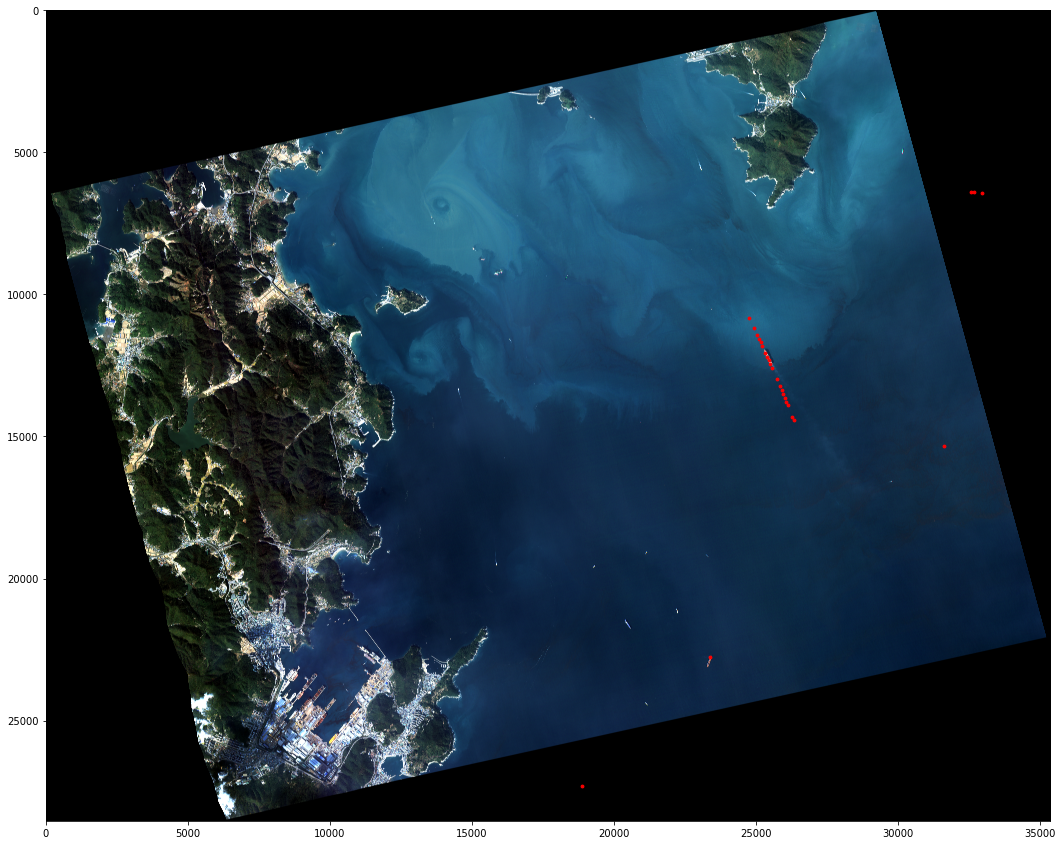

In [27]:
# Scatter Only 
# AIS 

plt.figure(figsize=(18,18))
plt.imshow(img_)
plt.scatter([i[1] for i in q_df['pixels']],[i[0] for i in q_df['pixels']], color='red',marker='o',s=8)

plt.savefig(args.img_output_scatter,dpi =800)
plt.show()

# Masking BBox in the land 

In [28]:
args.map_path
os.path.exists(args.map_path)

True

------------------- Eric Edited 


<Axes: >

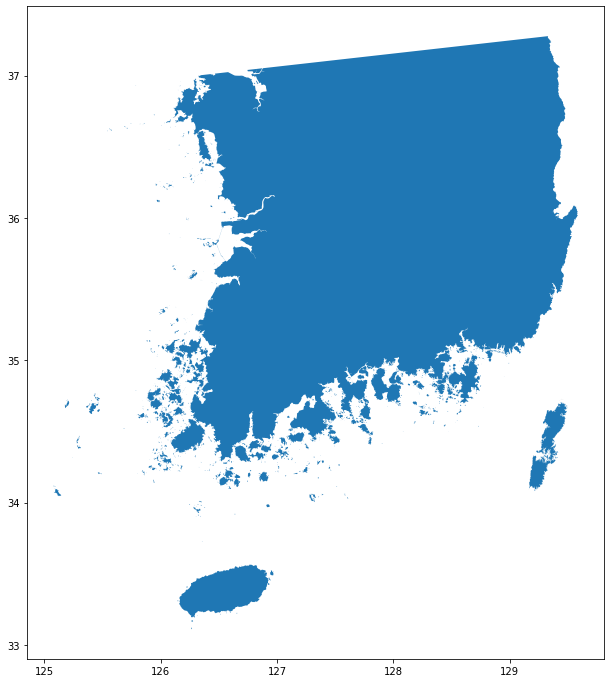

In [29]:
# Visualize Shape File !!
import geopandas as gpd
from shapely.geometry import Point
# Masking을 위한 shape 불러오기 
gdf=gpd.GeoDataFrame.from_file(args.map_path) #shapefile 불러오기

gpd.GeoSeries(gdf['geometry']).plot(figsize=(20,12)) #shapefile 플랏


In [30]:
import geopandas as gpd
from shapely.geometry import Point
# Masking을 위한 shape 불러오기 
gdf=gpd.GeoDataFrame.from_file(args.map_path) #shapefile 불러오기

# from pixel to utm
tmp_ =[] 
with rasterio.open(tf_path) as map_layer:
    for x,y in zip(M_['bbox x coord'].values, M_['bbox y coord'].values):
        
        x_coord,y_coord = map_layer.xy(y,x) # 여기 순서에 맞춰줘야, long,lat 좌표계가 맞음 
        tmp_.append([x_coord,y_coord])

tmp_1= []
ship_idxs = []
# from utm to latlon 
for idx,co in enumerate(tmp_):
    x,y = co[0],co[1]
    lat,lon = utm.to_latlon(x,y,52,"N")
    # print(lat,lon) # M_ 에서, 미리 설정되었던 AIS와 함께 좌표값 검증하였음

    print("progress : ", idx, " / ",len(tmp_))
    check=gdf['geometry'].contains(Point(lon,lat)) #특정 좌표 (long,lat)이 shapefile 다각형에 포함되는지 확인하기
    checkt=np.where(check == True)[0]
    
    if len(checkt) == 0:
        tmp_1.append(checkt)
        ship_idxs.append(idx)

progress :  0  /  821
progress :  1  /  821
progress :  2  /  821
progress :  3  /  821
progress :  4  /  821
progress :  5  /  821
progress :  6  /  821
progress :  7  /  821
progress :  8  /  821
progress :  9  /  821
progress :  10  /  821
progress :  11  /  821
progress :  12  /  821
progress :  13  /  821
progress :  14  /  821
progress :  15  /  821
progress :  16  /  821
progress :  17  /  821
progress :  18  /  821
progress :  19  /  821
progress :  20  /  821
progress :  21  /  821
progress :  22  /  821
progress :  23  /  821
progress :  24  /  821
progress :  25  /  821
progress :  26  /  821
progress :  27  /  821
progress :  28  /  821
progress :  29  /  821
progress :  30  /  821
progress :  31  /  821
progress :  32  /  821
progress :  33  /  821
progress :  34  /  821
progress :  35  /  821
progress :  36  /  821
progress :  37  /  821
progress :  38  /  821
progress :  39  /  821
progress :  40  /  821
progress :  41  /  821
progress :  42  /  821
progress :  43  /  82

In [31]:
# 마스킹하기 전, 탐색된 선박수
display(M_)

,box index,bbox x coord,bbox y coord,bbox width,bbox height,bbox angle,mmsi,heading,turn,speed,ais x coord(pixel),ais y coord(pixel),ais lat,ais long,ais time
0,0,23330.619141,22903.722656,428.292358,77.553810,-1.222879,477925100.0,203.0,0.0,0.2,23384,22756,34.889083,128.812667,023-10-28 13:32:4
1,6,25393.880859,12207.528320,570.270935,122.247627,1.080489,440328000.0,334.0,-1.0,9.7,25448,12323,34.955032,128.828360,023-10-28 13:33:2
2,125,25515.830078,12449.001953,89.819977,29.558455,-0.318962,440328000.0,334.0,0.0,9.7,25566,12590,34.953345,128.829267,023-10-28 13:32:4
3,178,25500.656250,12426.394531,96.425583,27.179117,-0.392700,440328000.0,334.0,0.0,9.7,25566,12590,34.953345,128.829267,023-10-28 13:32:4
4,227,25477.126953,12388.470703,100.182076,37.334015,-0.210853,440328000.0,334.0,0.0,9.7,25509,12459,34.954170,128.828825,023-10-28 13:33:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,816,11336.161133,24312.958984,62.913139,18.728413,0.756145,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
817,817,7872.520508,5132.009766,220.183136,63.904228,1.390837,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
818,818,6804.114258,26335.011719,136.307434,61.275639,0.309779,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
819,819,10925.745117,14362.299805,407.076355,38.471066,0.180794,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0


In [32]:
# visualize the result 
M_masked = M_.iloc[ship_idxs]
# sav the csv 
M_masked.to_csv(args.csv_output)
display(M_masked)

,box index,bbox x coord,bbox y coord,bbox width,bbox height,bbox angle,mmsi,heading,turn,speed,ais x coord(pixel),ais y coord(pixel),ais lat,ais long,ais time
0,0,23330.619141,22903.722656,428.292358,77.553810,-1.222879,477925100.0,203.0,0.0,0.2,23384,22756,34.889083,128.812667,023-10-28 13:32:4
1,6,25393.880859,12207.528320,570.270935,122.247627,1.080489,440328000.0,334.0,-1.0,9.7,25448,12323,34.955032,128.828360,023-10-28 13:33:2
2,125,25515.830078,12449.001953,89.819977,29.558455,-0.318962,440328000.0,334.0,0.0,9.7,25566,12590,34.953345,128.829267,023-10-28 13:32:4
3,178,25500.656250,12426.394531,96.425583,27.179117,-0.392700,440328000.0,334.0,0.0,9.7,25566,12590,34.953345,128.829267,023-10-28 13:32:4
4,227,25477.126953,12388.470703,100.182076,37.334015,-0.210853,440328000.0,334.0,0.0,9.7,25509,12459,34.954170,128.828825,023-10-28 13:33:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,799,11108.813477,11464.345703,38.547874,28.573311,-0.068231,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
800,800,13917.785156,23068.167969,104.198822,17.978399,1.543596,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
804,804,13492.958008,26770.533203,23.133299,11.264542,0.595508,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
811,811,1817.092529,11029.329102,43.104858,24.197611,-0.376948,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0


# Masked Visualization

/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/PIL/Image.py:3176: DecompressionBombWarning: Image size (1008521856 pixels) exceeds limit of 933120000 pixels, could be decompression bomb DOS attack.
  warnings.warn(


#-------------- 0.0043
#-------------- 0.0086
#-------------- 0.0129
#-------------- 0.0172
#-------------- 0.0216
#-------------- 0.0259
#-------------- 0.0302
#-------------- 0.0345
#-------------- 0.0388
#-------------- 0.0431
#-------------- 0.0474
#-------------- 0.0517
#-------------- 0.0560
#-------------- 0.0603
#-------------- 0.0647
#-------------- 0.0690
#-------------- 0.0733
#-------------- 0.0776
#-------------- 0.0819
#-------------- 0.0862
#-------------- 0.0905
#-------------- 0.0948
#-------------- 0.0991
#-------------- 0.1034
#-------------- 0.1078
#-------------- 0.1121
#-------------- 0.1164
#-------------- 0.1207
#-------------- 0.1250
#-------------- 0.1293
#-------------- 0.1336
#-------------- 0.1379
#-------------- 0.1422
#-------------- 0.1466
#-------------- 0.1509
#-------------- 0.1552
#-------------- 0.1595
#-------------- 0.1638
#-------------- 0.1681
#-------------- 0.1724
#-------------- 0.1767
#-------------- 0.1810
#-------------- 0.1853
#----------

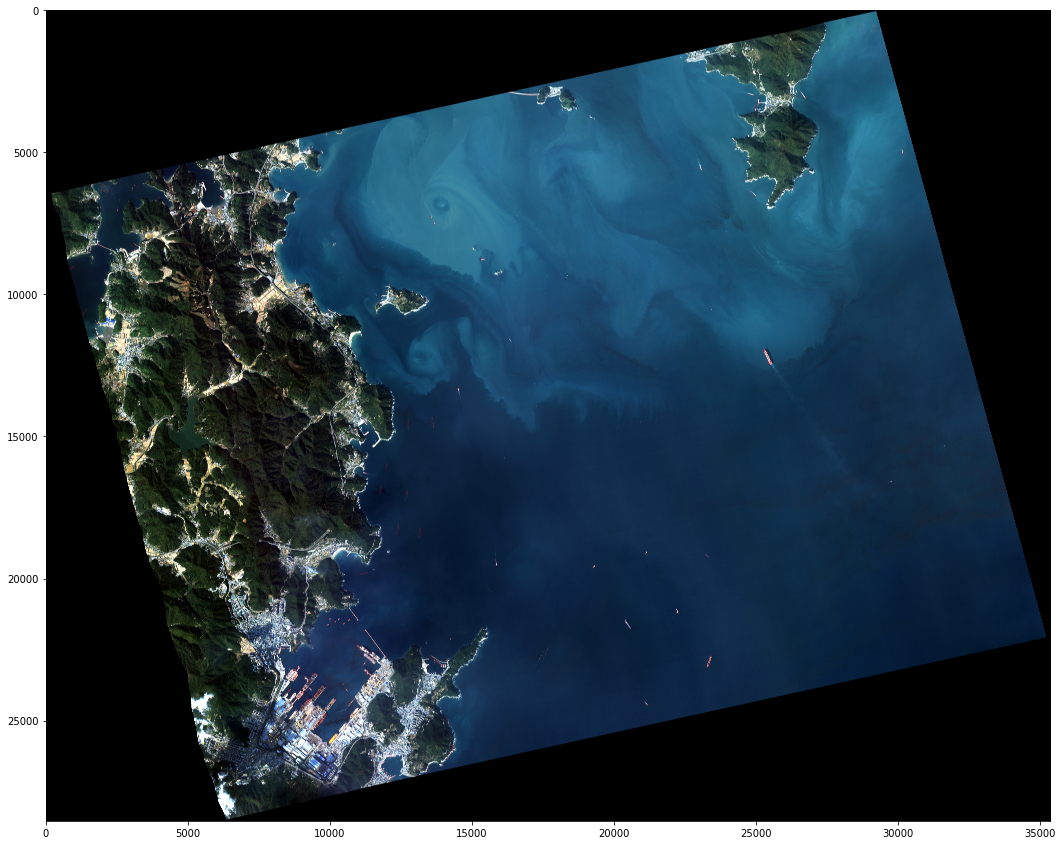

In [33]:
# visualize the result with masking 
# original image 
img_path = args.img_path
img_ = Image.open(img_path)

plt.figure(figsize=(18,18))
plt.imshow(img_)
ax = plt.gca()

#------------------------------------
# Bbox 
bboxes_ = [] 
cnt = 0
box_cnt = 0


# M_masked
for i,row in M_masked.iterrows():
    x = row['bbox x coord']
    y = row['bbox y coord']
    width = row['bbox width']
    height = row['bbox height']
    angle_ = row['bbox angle']
    
    box_cnt+=1
    print(f"#-------------- {box_cnt / len(M_masked):.4f}")
    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, linewidth=0.1, edgecolor="red", fill=False,
                                rotation_point="center",
                                angle=angle_*180/np.pi)
    
    ax.add_patch(path_obj)
#------------------------------------


plt.savefig(args.img_output_masked,dpi =1200 )
plt.show()

In [ ]:
# # Compare Experiment No masking 

# # visualize the result 
# # original image 
# img_path = args.img_path
# img_ = Image.open(img_path)

# plt.figure(figsize=(18,18))
# plt.imshow(img_)
# ax = plt.gca()

# #------------------------------------
# # Bbox 
# bboxes_ = [] 
# cnt = 0
# box_cnt = 0


# # No_masked
# for i,row in M_.iterrows():
#     x = row['bbox x coord']
#     y = row['bbox y coord']
#     width = row['bbox width']
#     height = row['bbox height']
#     angle_ = row['bbox angle']
    
#     box_cnt+=1
#     print(f"#-------------- {box_cnt / len(M_):.4f}")
#     path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, linewidth=0.1, edgecolor="red", fill=False,
#                                 rotation_point="center",
#                                 angle=angle_*180/np.pi)
    
#     ax.add_patch(path_obj)
# #------------------------------------


# plt.savefig(args.img_path.replace(".png" ,"_output_v2_1207_no_masking.png"),dpi =1200 )
# plt.show()

In [ ]:
# M_['land_included'] = tmp_1

In [ ]:
args.final_merge.replace("_PS.csv", "_PS_masking.csv")

'/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS/0-Pusan-2023-AO_3_C1_20230116015105_10110_00006119_L1G.csv'

In [ ]:
# import os 
# M_.to_csv(os.path.join("/mnt/hdd/eric/.tmp_ipy/00.Data/tmp_","test1.csv"),index=False )

In [ ]:
# import os 
# M_.to_csv(args.final_merge,index=False )